In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



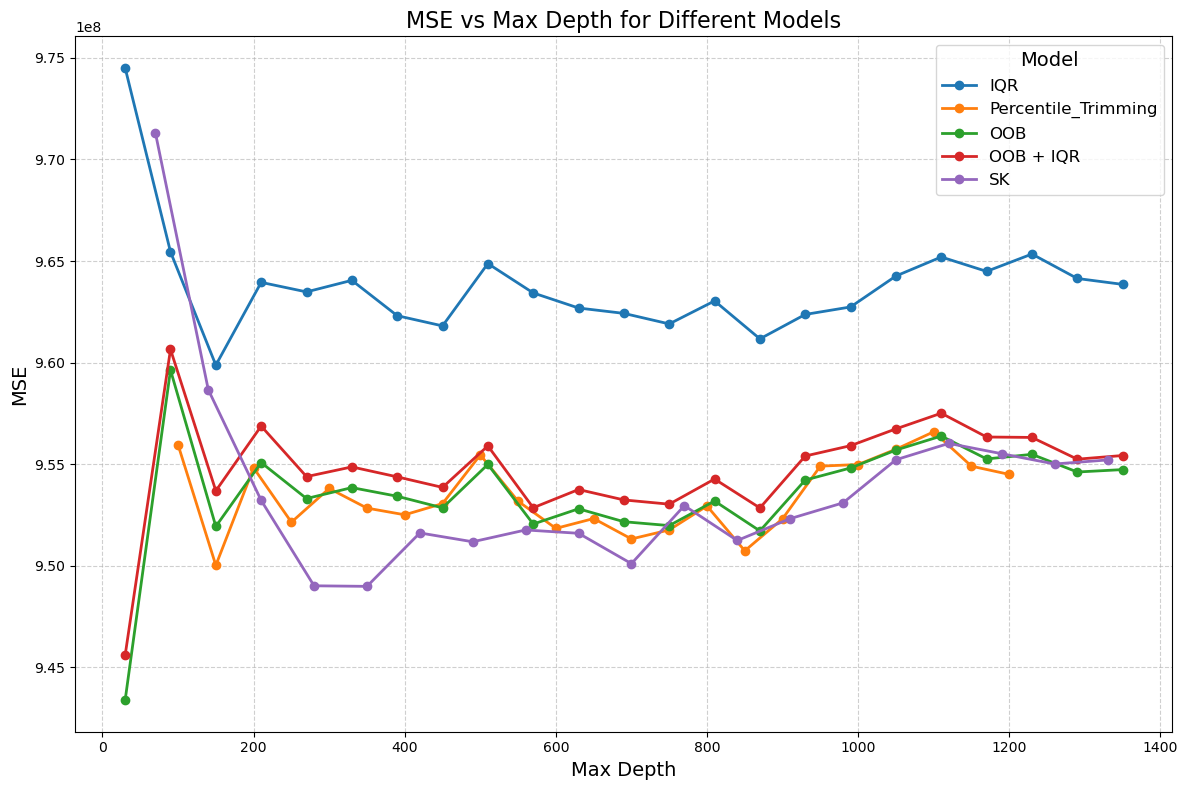

In [3]:
# Define data sources and models
data_sources = [
    {'file': 'graficos/results_hmap/House_8L/House_8L_IQR_n_estimators.npy', 'model': 'IQR'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_Percentile_Trimming_n_estimators.npy', 'model': 'Percentile_Trimming'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_OOB_n_estimators.npy', 'model': 'OOB'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_OOB_plus_IQR_n_estimators.npy', 'model': 'OOB + IQR'},
    #{'file': 'graficos/results_hmap/House_8L/House_8L_First_Splits_Combiner_n_estimators.npy', 'model': 'FSC'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_Shared_Knowledge_n_estimators.npy', 'model': 'SK'}
]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each model
for source in data_sources:
    # Load data
    data = np.load(source['file'])
    df = pd.DataFrame(data, columns=['n_estimators', 'MSE'])
    
    # Sort data by n_estimators to ensure smooth curves
    df = df.sort_values(by='n_estimators')
    
    # Plot line for the model
    plt.plot(df['n_estimators'], df['MSE'], label=source['model'], marker='o', linewidth=2, markersize=6)

# Customize plot
plt.title('MSE vs Max Depth for Different Models', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend(title='Model', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(alpha=0.6, linestyle='--')
plt.tight_layout()

# Show plot
plt.show()


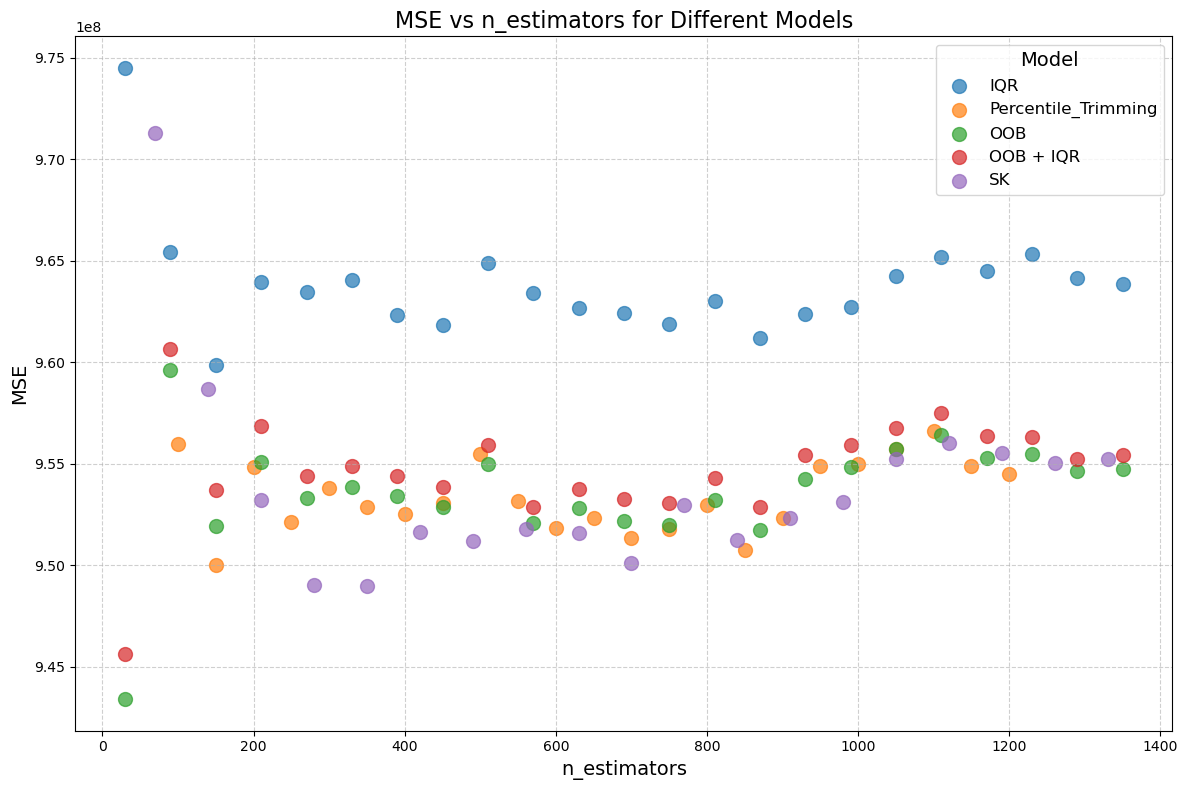

In [4]:
# Define data sources and models
data_sources = [
    {'file': 'graficos/results_hmap/House_8L/House_8L_IQR_n_estimators.npy', 'model': 'IQR'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_Percentile_Trimming_n_estimators.npy', 'model': 'Percentile_Trimming'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_OOB_n_estimators.npy', 'model': 'OOB'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_OOB_plus_IQR_n_estimators.npy', 'model': 'OOB + IQR'},
    #{'file': 'graficos/results_hmap/House_8L/House_8L_First_Splits_Combiner_n_estimators.npy', 'model': 'FSC'},
    {'file': 'graficos/results_hmap/House_8L/House_8L_Shared_Knowledge_n_estimators.npy', 'model': 'SK'}
]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each model
for source in data_sources:
    # Load data
    data = np.load(source['file'])
    df = pd.DataFrame(data, columns=['n_estimators', 'MSE'])
    
    # Plot
    plt.scatter(df['n_estimators'], df['MSE'], label=source['model'], s=100, alpha=0.7)

# Customize plot
plt.title('MSE vs n_estimators for Different Models', fontsize=16)
plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend(title='Model', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(alpha=0.6, linestyle='--')
plt.tight_layout()

# Show plot
plt.show()

In [20]:
data = np.load('graficos/results_hmap/House_8L/House_8L_Percentile_Trimming_group_size.npy')
print(data.shape)
data

(9, 2)


array([[3.0000000e+00, 9.7312576e+08],
       [5.0000000e+00, 9.5662003e+08],
       [6.0000000e+00, 9.5971584e+08],
       [1.0000000e+01, 9.5308646e+08],
       [1.5000000e+01, 9.5336192e+08],
       [2.5000000e+01, 9.5384410e+08],
       [3.0000000e+01, 9.5321638e+08],
       [5.0000000e+01, 9.5002515e+08],
       [7.5000000e+01, 9.5197894e+08]], dtype=float32)

In [21]:
columns = ['group_size', 'MSE']
df = pd.DataFrame(data, columns=columns)

sorted_df = df.sort_values(by='MSE', ascending=True)
sorted_df

,group_size,MSE
7,50.0,950025152.0
8,75.0,951978944.0
3,10.0,953086464.0
6,30.0,953216384.0
4,15.0,953361920.0
5,25.0,953844096.0
1,5.0,956620032.0
2,6.0,959715840.0
0,3.0,973125760.0


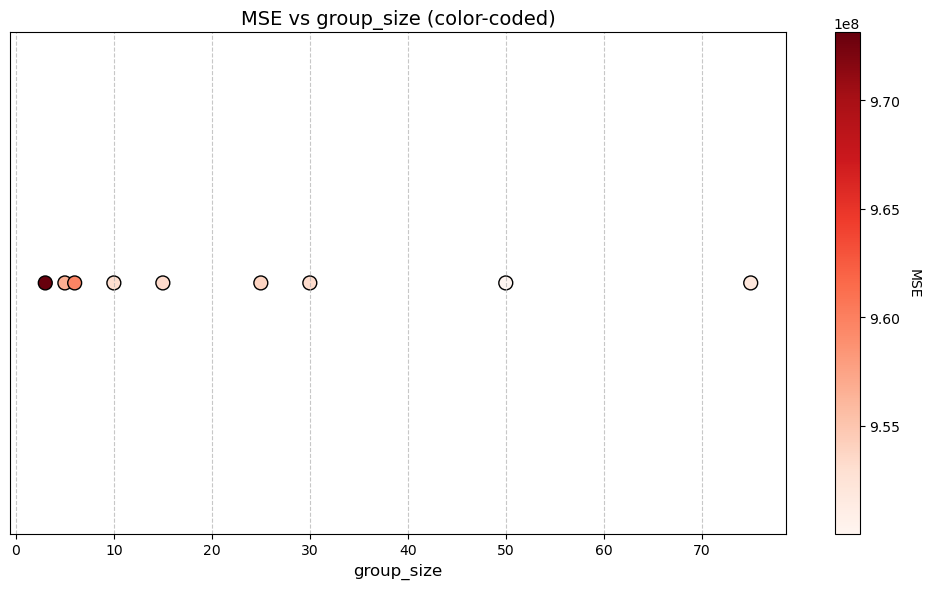

In [7]:
# Plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(sorted_df['group_size'], np.zeros(len(sorted_df)), 
                 c=sorted_df['MSE'], cmap='Reds', edgecolor='k', s=100)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('MSE', rotation=270, labelpad=15)

# Customize plot
plt.title('MSE vs group_size (color-coded)', fontsize=14)
plt.xlabel('group_size', fontsize=12)
plt.yticks([])  # Hide y-axis ticks as it is fixed
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


/tmp/ipykernel_11635/1762930138.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


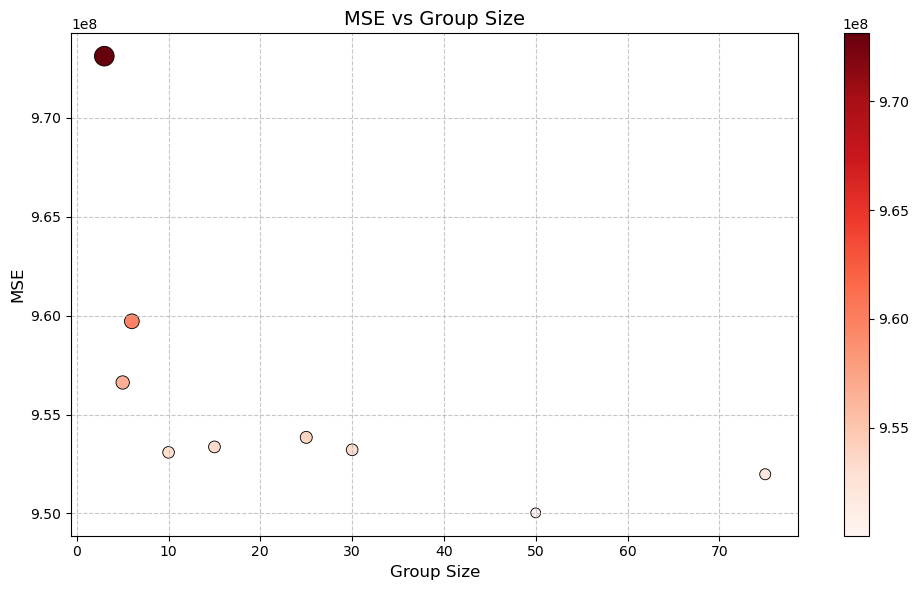

In [28]:
# Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=sorted_df, 
    x='group_size', 
    y='MSE', 
    hue='MSE', 
    palette='Reds', 
    size='MSE', 
    sizes=(50, 200),  # Marker size range
    edgecolor='k',  # Black border around points
    legend=False
)

# Add colorbar
norm = plt.Normalize(vmin=sorted_df['MSE'].min(), vmax=sorted_df['MSE'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
#cbar.set_label('MSE (color)', rotation=270, labelpad=15)

# Customize plot
plt.title('MSE vs Group Size', fontsize=14)
plt.xlabel('Group Size', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


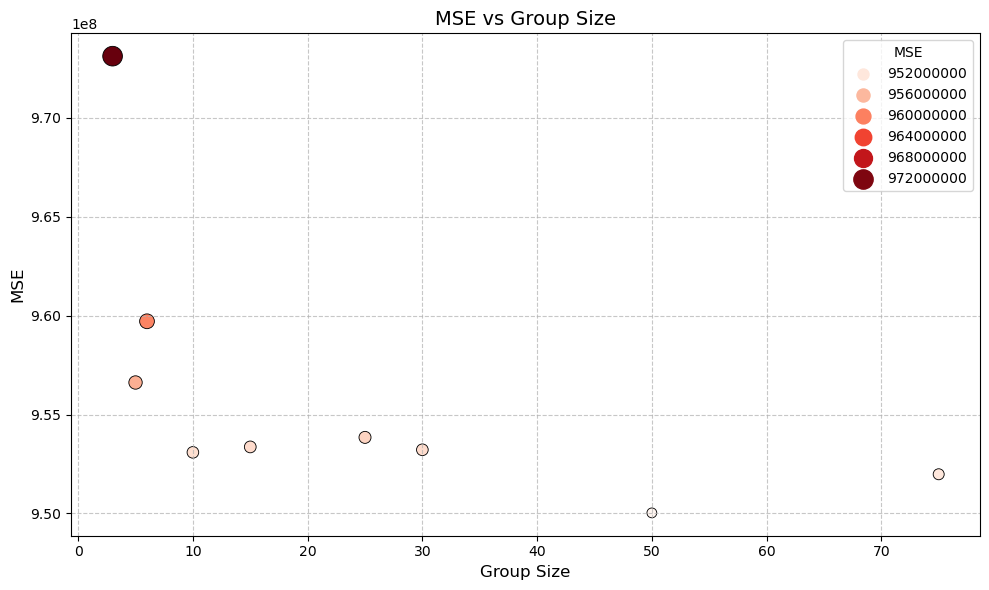

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=sorted_df, 
    x='group_size', 
    y='MSE', 
    hue='MSE', 
    palette='Reds', 
    size='MSE', 
    sizes=(50, 200),  # Marker size range
    edgecolor='k'  # Black border around points
)

# Add colorbar
# norm = plt.Normalize(vmin=sorted_df['MSE'].min(), vmax=sorted_df['MSE'].max())
# sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm)
#cbar.set_label('MSE (color)', rotation=270, labelpad=15)

# Customize plot
plt.title('MSE vs Group Size', fontsize=14)
plt.xlabel('Group Size', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


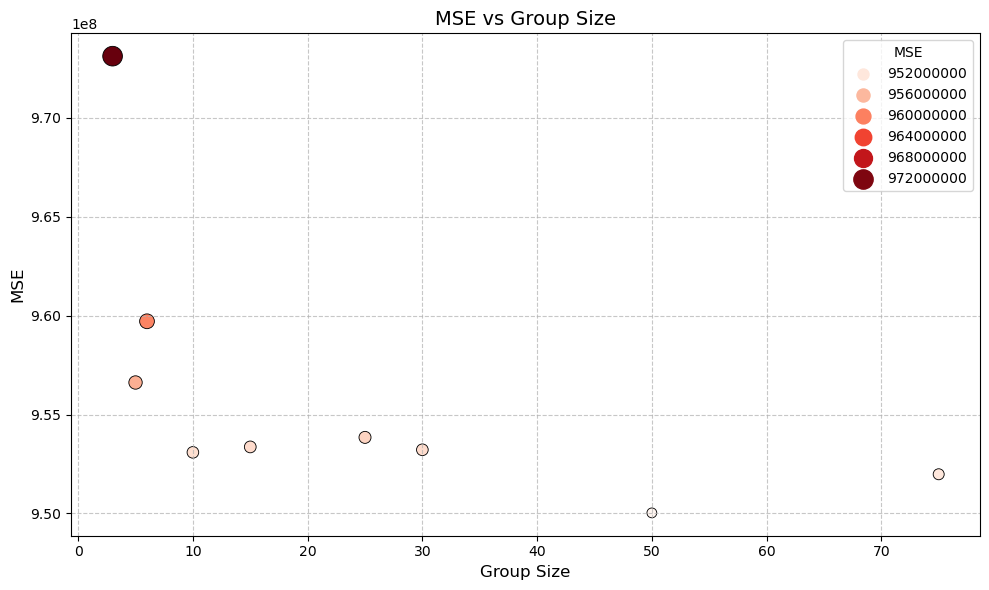

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=sorted_df, 
    x='group_size', 
    y='MSE', 
    hue='MSE', 
    palette='Reds', 
    size='MSE', 
    sizes=(50, 200),  # Marker size range
    edgecolor='k'  # Black border around points
)

# Add colorbar
# norm = plt.Normalize(vmin=sorted_df['MSE'].min(), vmax=sorted_df['MSE'].max())
# sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm)
#cbar.set_label('MSE (color)', rotation=270, labelpad=15)

# Customize plot
plt.title('MSE vs Group Size', fontsize=14)
plt.xlabel('Group Size', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [9]:
data = np.load('../resultados_grid_search/Carbon_Emission/Carbon_Emission_Percentile_Trimming.npy')
print(data.shape)
data

(2500, 5)


array([[1.5000000e+02, 2.5000000e+01, 3.5000000e+01, 1.5000000e+01,
        2.6573100e+05],
       [7.5000000e+02, 1.0000000e+01, 1.7000000e+01, 2.0000000e+00,
        2.6541481e+05],
       [2.7000000e+02, 1.5000000e+01, 1.7000000e+01, 3.0000000e+00,
        2.6321022e+05],
       ...,
       [6.0000000e+02, 1.5000000e+01, 1.3000000e+01, 9.0000000e+00,
        2.6931366e+05],
       [2.7000000e+02, 3.0000000e+00, 3.9000000e+01, 1.4000000e+01,
        2.6486559e+05],
       [1.0000000e+02, 5.0000000e+00, 4.4000000e+01, 2.0000000e+00,
        2.6747138e+05]], dtype=float32)

In [10]:
columns = ['n_estimators', 'group_size', 'max_depth', 'percentile', 'MSE']
df = pd.DataFrame(data, columns=columns)

sorted_df = df.sort_values(by='MSE', ascending=True)
sorted_df

,n_estimators,group_size,max_depth,percentile,MSE
983,150.0,15.0,17.0,3.0,260283.671875
69,150.0,50.0,34.0,2.0,261205.500000
74,150.0,50.0,44.0,1.0,261205.500000
1749,180.0,45.0,29.0,2.0,261301.765625
1271,140.0,35.0,21.0,1.0,261792.140625
...,...,...,...,...,...
325,300.0,15.0,10.0,15.0,281622.812500
2365,60.0,20.0,10.0,5.0,281751.218750
1432,50.0,10.0,11.0,15.0,282055.437500
261,100.0,50.0,10.0,13.0,282282.812500


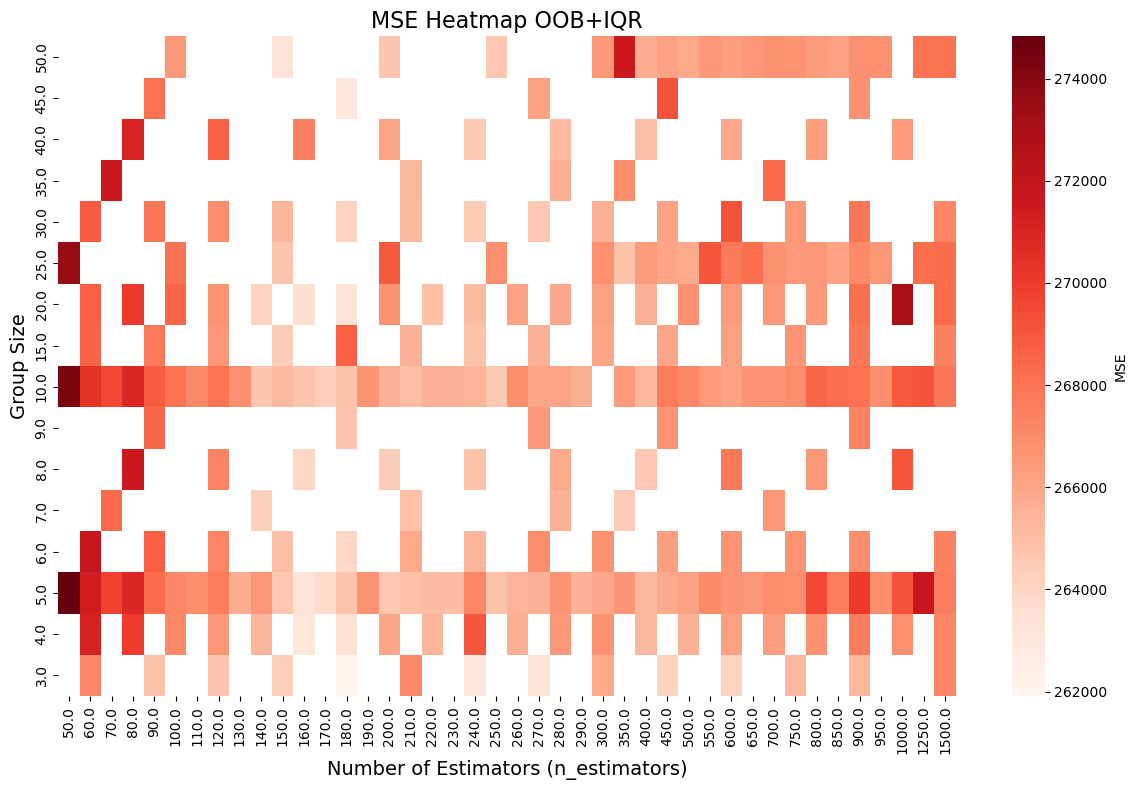

In [15]:
# Load data
data = np.load('../resultados_grid_search/Carbon_Emission/Carbon_Emission_OOB_plus_IQR.npy')
columns = ['n_estimators', 'group_size', 'max_depth', 'MSE']
df = pd.DataFrame(data, columns=columns)

# Sort data by group_size and n_estimators for consistent ordering
df = df.sort_values(by=['group_size', 'n_estimators'])

# Pivot the dataframe to prepare for heatmap
heatmap_data = df.pivot_table(index='group_size', columns='n_estimators', values='MSE')

# Ensure the y-axis (group_size) is in ascending order
heatmap_data = heatmap_data.sort_index(ascending=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=False, fmt=".2f", cmap="Reds", 
    cbar_kws={'label': 'MSE'}
)

# Customize plot
plt.title('MSE Heatmap OOB+IQR', fontsize=16)
plt.xlabel('Number of Estimators (n_estimators)', fontsize=14)
plt.ylabel('Group Size', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


/tmp/ipykernel_11635/366302682.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


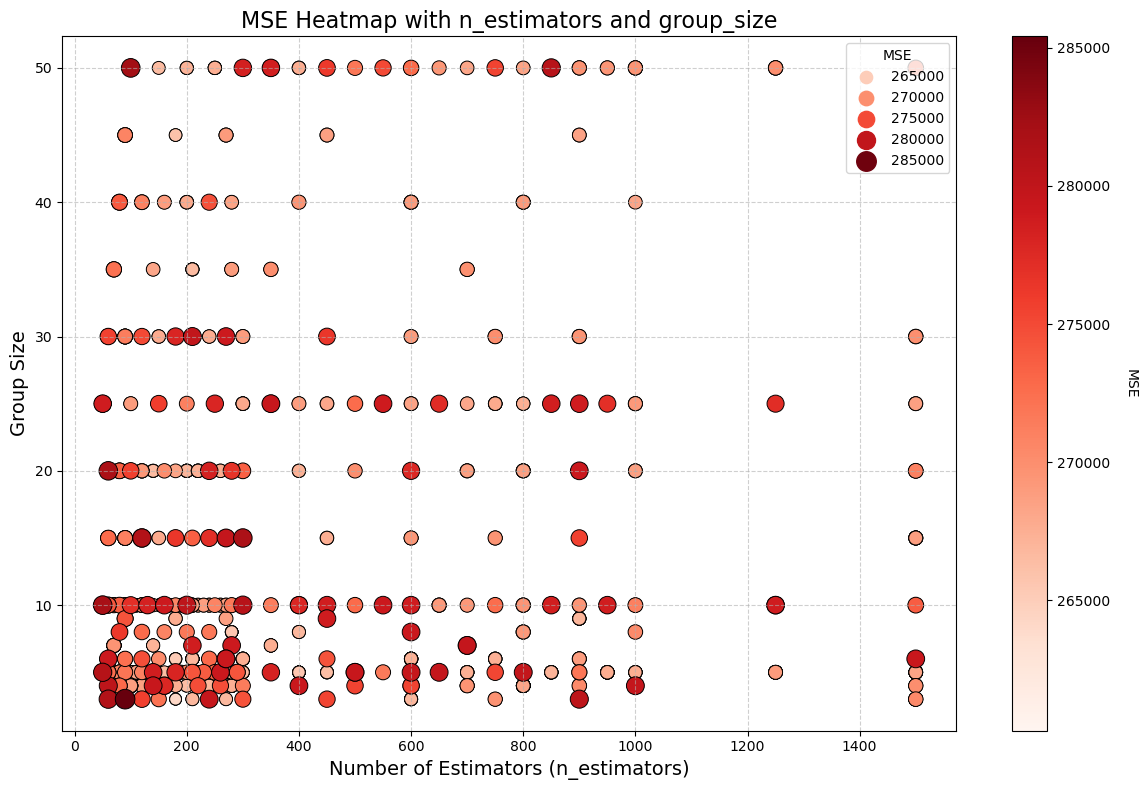

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = np.load('../resultados_grid_search/Carbon_Emission/Carbon_Emission_Percentile_Trimming.npy')
columns = ['n_estimators', 'group_size', 'max_depth', 'percentile', 'MSE']
df = pd.DataFrame(data, columns=columns)

# Sort data by MSE (optional for visualization clarity)
sorted_df = df.sort_values(by='MSE', ascending=True)

# Create the plot
plt.figure(figsize=(12, 8))

# Seaborn scatter plot
sns.scatterplot(
    data=sorted_df,
    x='n_estimators',
    y='group_size',
    hue='MSE',
    palette='Reds',
    size='MSE',
    sizes=(50, 200),  # Adjust size range
    edgecolor='k'
)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=sorted_df['MSE'].min(), vmax=sorted_df['MSE'].max()))
cbar = plt.colorbar(sm)
cbar.set_label('MSE', rotation=270, labelpad=20)

# Customize plot
plt.title('MSE Heatmap with n_estimators and group_size', fontsize=16)
plt.xlabel('Number of Estimators (n_estimators)', fontsize=14)
plt.ylabel('Group Size', fontsize=14)
plt.grid(alpha=0.6, linestyle='--')
plt.tight_layout()

# Show plot
plt.show()
